In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl 
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
train_data = pd.read_csv("train.csv",parse_dates=[0,2,3,4,5,6,19])
test_data = pd.read_csv("test.csv",parse_dates=[0,2,3,4,5,6])

In [4]:
train_data.head()

order_time  order_id order_date          allot_time  \
0 2021-01-26 02:21:35    556753 2021-01-26 2021-01-26 02:21:59   
1 2021-01-26 02:33:16    556754 2021-01-26 2021-01-26 02:33:57   
2 2021-01-26 02:39:49    556755 2021-01-26 2021-01-26 02:39:57   
3 2021-01-26 02:47:53    556756 2021-01-26 2021-01-26 02:48:25   
4 2021-01-26 03:06:30    556757 2021-01-26 2021-01-26 03:07:21   

          accept_time         pickup_time      delivered_time  rider_id  \
0 2021-01-26 02:22:08 2021-01-26 02:32:51 2021-01-26 02:49:47     11696   
1 2021-01-26 02:34:45 2021-01-26 02:50:25 2021-01-26 03:11:15     18117   
2 2021-01-26 02:40:13 2021-01-26 02:56:00 2021-01-26 03:12:46     18623   
3 2021-01-26 02:49:06 2021-01-26 03:21:51 2021-01-26 03:41:05     15945   
4 2021-01-26 03:07:57 2021-01-26 03:31:38 2021-01-26 04:00:15     17589   

   first_mile_distance  last_mile_distance  alloted_orders  delivered_orders  \
0               1.5666                2.65            46.0              46.0   
1               2.5207                2.76             8.0               8.0   
2               2.2074                4.80             1.0               1.0   
3               2.1894                6.38             1.0               1.0   
4               2.7870                4.01            34.0              34.0   

   cancelled  undelivered_orders  lifetime_order_count reassignment_method  \
0          0                 0.0                 621.0                 NaN   
1          0                 0.0                 105.0                 NaN   
2          0                 0.0                  66.0                 NaN   
3          0                 0.0                 127.0                 NaN   
4          0                 0.0                  84.0                 NaN   

  reassignment_reason  reassigned_order  session_time cancelled_time  
0                 NaN               NaN           NaN            NaT  
1                 NaN               NaN      3.266667            NaT  
2                 NaN               NaN      9.816667            NaT  
3                 NaN               NaN     17.533333            NaT  
4                 NaN               NaN      1.350000            NaT

In [5]:
train_data.describe()

order_id       rider_id  first_mile_distance  last_mile_distance  \
count  450000.000000  450000.000000        450000.000000       450000.000000   
mean   369143.080767    7763.244016             1.229889            2.968873   
std    131146.906408    5592.880135             0.846183            1.884124   
min    118350.000000       0.000000             0.000134            0.000000   
25%    257342.750000    2805.000000             0.539575            1.470000   
50%    369842.500000    6754.000000             1.138700            2.670000   
75%    482342.250000   11965.000000             1.853000            4.220000   
max    594842.000000   21566.000000            42.038100           22.410000   

       alloted_orders  delivered_orders      cancelled  undelivered_orders  \
count   433052.000000     432659.000000  450000.000000       432659.000000   
mean       104.620909        103.950448       0.011596            0.764165   
std         90.135492         89.639646       0.107057            1.066473   
min          1.000000          1.000000       0.000000            0.000000   
25%         36.000000         36.000000       0.000000            0.000000   
50%         81.000000         81.000000       0.000000            0.000000   
75%        147.000000        146.000000       0.000000            1.000000   
max        567.000000        562.000000       1.000000            9.000000   

       lifetime_order_count  reassigned_order   session_time  
count         449947.000000           13753.0  446325.000000  
mean             853.640664               1.0     220.474779  
std             1502.976162               0.0     176.713853  
min                0.000000               1.0       0.000000  
25%              165.000000               1.0      84.100000  
50%              396.000000               1.0     175.550000  
75%              948.000000               1.0     316.766667  
max            30469.000000               1.0    1298.966667

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450000 entries, 0 to 449999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_time            450000 non-null  datetime64[ns]
 1   order_id              450000 non-null  int64         
 2   order_date            450000 non-null  datetime64[ns]
 3   allot_time            450000 non-null  datetime64[ns]
 4   accept_time           449843 non-null  datetime64[ns]
 5   pickup_time           447579 non-null  datetime64[ns]
 6   delivered_time        444782 non-null  datetime64[ns]
 7   rider_id              450000 non-null  int64         
 8   first_mile_distance   450000 non-null  float64       
 9   last_mile_distance    450000 non-null  float64       
 10  alloted_orders        433052 non-null  float64       
 11  delivered_orders      432659 non-null  float64       
 12  cancelled             450000 non-null  int64         
 13 

In [7]:
help(train_data['reassignment_method'])

Help on Series in module pandas.core.series object:

class Series(pandas.core.base.IndexOpsMixin, pandas.core.generic.NDFrame)
 |  Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)
 |  
 |  One-dimensional ndarray with axis labels (including time series).
 |  
 |  Labels need not be unique but must be a hashable type. The object
 |  supports both integer- and label-based indexing and provides a host of
 |  methods for performing operations involving the index. Statistical
 |  methods from ndarray have been overridden to automatically exclude
 |  missing data (currently represented as NaN).
 |  
 |  Operations between Series (+, -, /, *, **) align values based on their
 |  associated index values-- they need not be the same length. The result
 |  index will be the sorted union of the two indexes.
 |  
 |  Parameters
 |  ----------
 |  data : array-like, Iterable, dict, or scalar value
 |      Contains data stored in Series. If data is a dict, argument orde

In [8]:
import seaborn as sns

C:\Users\rahul_liauvpp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

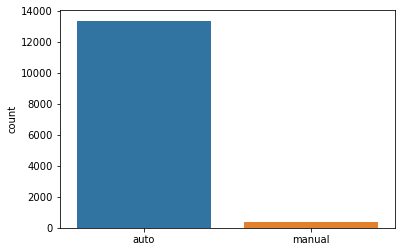

In [9]:
sns.countplot(train_data['reassignment_method'].values)

C:\Users\rahul_liauvpp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

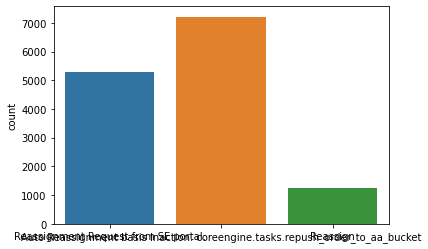

In [10]:
sns.countplot(train_data['reassignment_reason'].values)

In [11]:
train_data['reassignment_method'].value_counts()

auto      13383
manual      361
Name: reassignment_method, dtype: int64

In [12]:
train_data['reassignment_reason'].value_counts()

Auto Reassignment basis Inaction. coreengine.tasks.repush_order_to_aa_bucket    7212
Reassignment Request from SE portal.                                            5300
Reassign                                                                        1241
Name: reassignment_reason, dtype: int64

In [13]:
train_data['order_time']-train_data['order_date']

0        0 days 02:21:35
1        0 days 02:33:16
2        0 days 02:39:49
3        0 days 02:47:53
4        0 days 03:06:30
               ...      
449995   0 days 10:03:16
449996   0 days 10:03:17
449997   0 days 10:03:18
449998   0 days 10:03:19
449999   0 days 10:03:24
Length: 450000, dtype: timedelta64[ns]

## DATA SET IMBALANCE

In [14]:
train_data['cancelled'].value_counts()

0    444782
1      5218
Name: cancelled, dtype: int64

# INDEPENDENT VARIABLES

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450000 entries, 0 to 449999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_time            450000 non-null  datetime64[ns]
 1   order_id              450000 non-null  int64         
 2   order_date            450000 non-null  datetime64[ns]
 3   allot_time            450000 non-null  datetime64[ns]
 4   accept_time           449843 non-null  datetime64[ns]
 5   pickup_time           447579 non-null  datetime64[ns]
 6   delivered_time        444782 non-null  datetime64[ns]
 7   rider_id              450000 non-null  int64         
 8   first_mile_distance   450000 non-null  float64       
 9   last_mile_distance    450000 non-null  float64       
 10  alloted_orders        433052 non-null  float64       
 11  delivered_orders      432659 non-null  float64       
 12  cancelled             450000 non-null  int64         
 13 

In [16]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144844 entries, 0 to 144843
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_time            144844 non-null  datetime64[ns]
 1   order_id              144844 non-null  int64         
 2   order_date            144844 non-null  datetime64[ns]
 3   allot_time            144844 non-null  datetime64[ns]
 4   accept_time           144776 non-null  datetime64[ns]
 5   rider_id              144844 non-null  object        
 6   first_mile_distance   144844 non-null  object        
 7   last_mile_distance    144844 non-null  float64       
 8   alloted_orders        140071 non-null  float64       
 9   delivered_orders      139960 non-null  float64       
 10  undelivered_orders    139960 non-null  float64       
 11  lifetime_order_count  144066 non-null  float64       
 12  reassignment_method   4632 non-null    object        
 13 

pickup_time,delivered_time,cancelled_time are not there in test_data.. so we need to drop those from our training data set

Order date:- what to do???
    1)Mark days as weekdays, non-week days
    2)Take year, month and day and feed it to the model
Order time:- what to do??
    1) take hours and minutes and create a cycle or raw
    2)process entire

In [17]:
train_data['undelivered_orders'].value_counts()

0.0    232686
1.0    118103
2.0     50582
3.0     20011
4.0      7733
5.0      1851
6.0       932
7.0       600
8.0       105
9.0        56
Name: undelivered_orders, dtype: int64

In [18]:
del train_data['pickup_time']

In [19]:
del train_data['delivered_time']

In [20]:
del train_data['cancelled_time']

In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450000 entries, 0 to 449999
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_time            450000 non-null  datetime64[ns]
 1   order_id              450000 non-null  int64         
 2   order_date            450000 non-null  datetime64[ns]
 3   allot_time            450000 non-null  datetime64[ns]
 4   accept_time           449843 non-null  datetime64[ns]
 5   rider_id              450000 non-null  int64         
 6   first_mile_distance   450000 non-null  float64       
 7   last_mile_distance    450000 non-null  float64       
 8   alloted_orders        433052 non-null  float64       
 9   delivered_orders      432659 non-null  float64       
 10  cancelled             450000 non-null  int64         
 11  undelivered_orders    432659 non-null  float64       
 12  lifetime_order_count  449947 non-null  float64       
 13 

In [22]:
del train_data['order_date']
del test_data['order_date']

In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450000 entries, 0 to 449999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_time            450000 non-null  datetime64[ns]
 1   order_id              450000 non-null  int64         
 2   allot_time            450000 non-null  datetime64[ns]
 3   accept_time           449843 non-null  datetime64[ns]
 4   rider_id              450000 non-null  int64         
 5   first_mile_distance   450000 non-null  float64       
 6   last_mile_distance    450000 non-null  float64       
 7   alloted_orders        433052 non-null  float64       
 8   delivered_orders      432659 non-null  float64       
 9   cancelled             450000 non-null  int64         
 10  undelivered_orders    432659 non-null  float64       
 11  lifetime_order_count  449947 non-null  float64       
 12  reassignment_method   13744 non-null   object        
 13 

In [24]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144844 entries, 0 to 144843
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_time            144844 non-null  datetime64[ns]
 1   order_id              144844 non-null  int64         
 2   allot_time            144844 non-null  datetime64[ns]
 3   accept_time           144776 non-null  datetime64[ns]
 4   rider_id              144844 non-null  object        
 5   first_mile_distance   144844 non-null  object        
 6   last_mile_distance    144844 non-null  float64       
 7   alloted_orders        140071 non-null  float64       
 8   delivered_orders      139960 non-null  float64       
 9   undelivered_orders    139960 non-null  float64       
 10  lifetime_order_count  144066 non-null  float64       
 11  reassignment_method   4632 non-null    object        
 12  reassignment_reason   4635 non-null    object        
 13 

## Modyfying Objects

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
label_encoder=LabelEncoder()
train_data['reassignment_method']=label_encoder.fit_transform(train_data['reassignment_method'])

C:\Users\rahul_liauvpp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='reassignment_method', ylabel='count'>

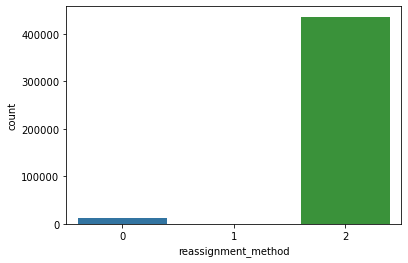

In [27]:
sns.countplot(train_data['reassignment_method'])

In [28]:
train_data['reassignment_method'].value_counts()

2    436256
0     13383
1       361
Name: reassignment_method, dtype: int64

In [29]:
label_encoder2=LabelEncoder()
train_data['reassignment_reason']=label_encoder.fit_transform(train_data['reassignment_reason'])

In [30]:
train_data['reassignment_reason'].value_counts()

3    436247
0      7212
2      5300
1      1241
Name: reassignment_reason, dtype: int64

In [31]:
test_data['reassignment_method']=label_encoder.fit_transform(test_data['reassignment_method'])
test_data['reassignment_reason']=label_encoder2.fit_transform(test_data['reassignment_reason'])

In [32]:
test_data['reassignment_reason'].value_counts()

3    140209
0      2593
2      1582
1       460
Name: reassignment_reason, dtype: int64

In [33]:
test_data['reassignment_method'].value_counts()

2    140212
0      4531
1       101
Name: reassignment_method, dtype: int64

#### why to keep 3 variables which indicate same thing? converting them

In [34]:
train_data['reassignment_score']=230+train_data['reassigned_order']-train_data['reassignment_method']*100-train_data['reassignment_reason']*10
test_data['reassignment_score']=230+train_data['reassigned_order']-test_data['reassignment_method']*100-test_data['reassignment_reason']*10

In [35]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450000 entries, 0 to 449999
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_time            450000 non-null  datetime64[ns]
 1   order_id              450000 non-null  int64         
 2   allot_time            450000 non-null  datetime64[ns]
 3   accept_time           449843 non-null  datetime64[ns]
 4   rider_id              450000 non-null  int64         
 5   first_mile_distance   450000 non-null  float64       
 6   last_mile_distance    450000 non-null  float64       
 7   alloted_orders        433052 non-null  float64       
 8   delivered_orders      432659 non-null  float64       
 9   cancelled             450000 non-null  int64         
 10  undelivered_orders    432659 non-null  float64       
 11  lifetime_order_count  449947 non-null  float64       
 12  reassignment_method   450000 non-null  int32         
 13 

In [36]:
#train_data['is_weekend'].sum()

In [37]:
train_data.size

7650000

# Now that strings are removed let's focus on handling dates

In [38]:
train_data['is_weekend']=np.where(train_data['allot_time'].dt.day_name().isin(['Sunday','Saturday']),1,0)
test_data['is_weekend']=np.where(test_data['allot_time'].dt.day_name().isin(['Sunday','Saturday']),1,0)


In [39]:
train_data['is_weekend'].value_counts()

0    361276
1     88724
Name: is_weekend, dtype: int64

In [40]:
test_data['is_weekend'].value_counts()

0    80445
1    64399
Name: is_weekend, dtype: int64

## FORGOT SOMETHING!! Missing values!!

In [41]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450000 entries, 0 to 449999
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_time            450000 non-null  datetime64[ns]
 1   order_id              450000 non-null  int64         
 2   allot_time            450000 non-null  datetime64[ns]
 3   accept_time           449843 non-null  datetime64[ns]
 4   rider_id              450000 non-null  int64         
 5   first_mile_distance   450000 non-null  float64       
 6   last_mile_distance    450000 non-null  float64       
 7   alloted_orders        433052 non-null  float64       
 8   delivered_orders      432659 non-null  float64       
 9   cancelled             450000 non-null  int64         
 10  undelivered_orders    432659 non-null  float64       
 11  lifetime_order_count  449947 non-null  float64       
 12  reassignment_method   450000 non-null  int32         
 13 

C:\Users\rahul_liauvpp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='alloted_orders'>

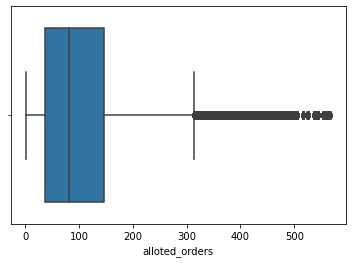

In [42]:
sns.boxplot(train_data['alloted_orders'])

C:\Users\rahul_liauvpp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='alloted_orders', ylabel='count'>

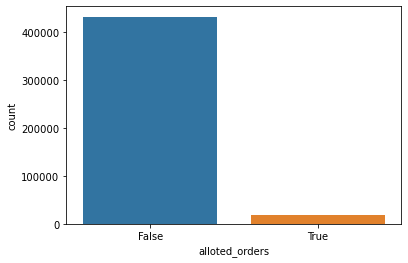

In [43]:
sns.countplot((train_data['alloted_orders']>300))

In [44]:
(train_data['alloted_orders']>500).sum()

390

In [45]:
train_data.describe()

order_id       rider_id  first_mile_distance  last_mile_distance  \
count  450000.000000  450000.000000        450000.000000       450000.000000   
mean   369143.080767    7763.244016             1.229889            2.968873   
std    131146.906408    5592.880135             0.846183            1.884124   
min    118350.000000       0.000000             0.000134            0.000000   
25%    257342.750000    2805.000000             0.539575            1.470000   
50%    369842.500000    6754.000000             1.138700            2.670000   
75%    482342.250000   11965.000000             1.853000            4.220000   
max    594842.000000   21566.000000            42.038100           22.410000   

       alloted_orders  delivered_orders      cancelled  undelivered_orders  \
count   433052.000000     432659.000000  450000.000000       432659.000000   
mean       104.620909        103.950448       0.011596            0.764165   
std         90.135492         89.639646       0.107057            1.066473   
min          1.000000          1.000000       0.000000            0.000000   
25%         36.000000         36.000000       0.000000            0.000000   
50%         81.000000         81.000000       0.000000            0.000000   
75%        147.000000        146.000000       0.000000            1.000000   
max        567.000000        562.000000       1.000000            9.000000   

       lifetime_order_count  reassignment_method  reassignment_reason  \
count         449947.000000        450000.000000        450000.000000   
mean             853.640664             1.939718             2.934627   
std             1502.976162             0.340776             0.403455   
min                0.000000             0.000000             0.000000   
25%              165.000000             2.000000             3.000000   
50%              396.000000             2.000000             3.000000   
75%              948.000000             2.000000             3.000000   
max            30469.000000             2.000000             3.000000   

       reassigned_order   session_time  reassignment_score     is_weekend  
count           13753.0  446325.000000        13753.000000  450000.000000  
mean                1.0     220.474779          219.634480       0.197164  
std                 0.0     176.713853           19.283176       0.397858  
min                 1.0       0.000000           11.000000       0.000000  
25%                 1.0      84.100000          211.000000       0.000000  
50%                 1.0     175.550000          231.000000       0.000000  
75%                 1.0     316.766667          231.000000       0.000000  
max                 1.0    1298.966667          231.000000       1.000000

In [46]:
train_data['alloted_orders']=train_data['alloted_orders'].fillna(train_data['alloted_orders'].mean())

In [47]:
train_data.describe()

order_id       rider_id  first_mile_distance  last_mile_distance  \
count  450000.000000  450000.000000        450000.000000       450000.000000   
mean   369143.080767    7763.244016             1.229889            2.968873   
std    131146.906408    5592.880135             0.846183            1.884124   
min    118350.000000       0.000000             0.000134            0.000000   
25%    257342.750000    2805.000000             0.539575            1.470000   
50%    369842.500000    6754.000000             1.138700            2.670000   
75%    482342.250000   11965.000000             1.853000            4.220000   
max    594842.000000   21566.000000            42.038100           22.410000   

       alloted_orders  delivered_orders      cancelled  undelivered_orders  \
count   450000.000000     432659.000000  450000.000000       432659.000000   
mean       104.620909        103.950448       0.011596            0.764165   
std         88.421847         89.639646       0.107057            1.066473   
min          1.000000          1.000000       0.000000            0.000000   
25%         38.000000         36.000000       0.000000            0.000000   
50%         85.000000         81.000000       0.000000            0.000000   
75%        144.000000        146.000000       0.000000            1.000000   
max        567.000000        562.000000       1.000000            9.000000   

       lifetime_order_count  reassignment_method  reassignment_reason  \
count         449947.000000        450000.000000        450000.000000   
mean             853.640664             1.939718             2.934627   
std             1502.976162             0.340776             0.403455   
min                0.000000             0.000000             0.000000   
25%              165.000000             2.000000             3.000000   
50%              396.000000             2.000000             3.000000   
75%              948.000000             2.000000             3.000000   
max            30469.000000             2.000000             3.000000   

       reassigned_order   session_time  reassignment_score     is_weekend  
count           13753.0  446325.000000        13753.000000  450000.000000  
mean                1.0     220.474779          219.634480       0.197164  
std                 0.0     176.713853           19.283176       0.397858  
min                 1.0       0.000000           11.000000       0.000000  
25%                 1.0      84.100000          211.000000       0.000000  
50%                 1.0     175.550000          231.000000       0.000000  
75%                 1.0     316.766667          231.000000       0.000000  
max                 1.0    1298.966667          231.000000       1.000000

In [48]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450000 entries, 0 to 449999
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_time            450000 non-null  datetime64[ns]
 1   order_id              450000 non-null  int64         
 2   allot_time            450000 non-null  datetime64[ns]
 3   accept_time           449843 non-null  datetime64[ns]
 4   rider_id              450000 non-null  int64         
 5   first_mile_distance   450000 non-null  float64       
 6   last_mile_distance    450000 non-null  float64       
 7   alloted_orders        450000 non-null  float64       
 8   delivered_orders      432659 non-null  float64       
 9   cancelled             450000 non-null  int64         
 10  undelivered_orders    432659 non-null  float64       
 11  lifetime_order_count  449947 non-null  float64       
 12  reassignment_method   450000 non-null  int32         
 13 

In [49]:
train_data['delivered_orders']=train_data['delivered_orders'].fillna(train_data['delivered_orders'].mean())

In [50]:
train_data['undelivered_orders']=train_data['undelivered_orders'].fillna(0)

In [51]:
train_data['session_time']=train_data['session_time'].fillna(train_data['session_time'].mean())

In [52]:
train_data['lifetime_order_count']=train_data['lifetime_order_count'].fillna(train_data['lifetime_order_count'].mean())

In [53]:
train_data['reassigned_order'].value_counts()

1.0    13753
Name: reassigned_order, dtype: int64

In [54]:
train_data['reassigned_order']=train_data['reassigned_order'].fillna(0)

In [55]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450000 entries, 0 to 449999
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_time            450000 non-null  datetime64[ns]
 1   order_id              450000 non-null  int64         
 2   allot_time            450000 non-null  datetime64[ns]
 3   accept_time           449843 non-null  datetime64[ns]
 4   rider_id              450000 non-null  int64         
 5   first_mile_distance   450000 non-null  float64       
 6   last_mile_distance    450000 non-null  float64       
 7   alloted_orders        450000 non-null  float64       
 8   delivered_orders      450000 non-null  float64       
 9   cancelled             450000 non-null  int64         
 10  undelivered_orders    450000 non-null  float64       
 11  lifetime_order_count  450000 non-null  float64       
 12  reassignment_method   450000 non-null  int32         
 13 

In [56]:
train_data['wait_time']=(train_data['allot_time']-train_data['accept_time'])/np.timedelta64(1,'m')

C:\Users\rahul_liauvpp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wait_time'>

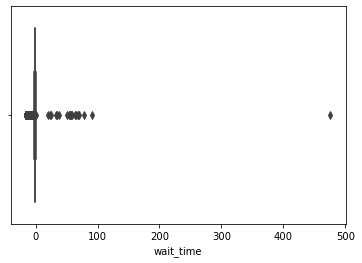

In [57]:
sns.boxplot(train_data['wait_time'])

C:\Users\rahul_liauvpp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wait_time'>

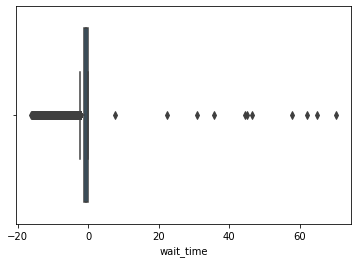

In [58]:
test_data['wait_time']=(test_data['allot_time']-test_data['accept_time'])/np.timedelta64(1,'m')
sns.boxplot(test_data['wait_time'])

In [59]:
test_data['wait_time'].describe()

count    144776.000000
mean         -1.024998
std           1.664429
min         -16.116667
25%          -1.116667
50%          -0.616667
75%          -0.216667
max          70.216667
Name: wait_time, dtype: float64

#### Since there are no waittime >100 in test_data it is being removed from train data

In [60]:
Train_data=train_data
train_data=train_data[train_data['wait_time']<=100]

In [61]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449842 entries, 0 to 449999
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_time            449842 non-null  datetime64[ns]
 1   order_id              449842 non-null  int64         
 2   allot_time            449842 non-null  datetime64[ns]
 3   accept_time           449842 non-null  datetime64[ns]
 4   rider_id              449842 non-null  int64         
 5   first_mile_distance   449842 non-null  float64       
 6   last_mile_distance    449842 non-null  float64       
 7   alloted_orders        449842 non-null  float64       
 8   delivered_orders      449842 non-null  float64       
 9   cancelled             449842 non-null  int64         
 10  undelivered_orders    449842 non-null  float64       
 11  lifetime_order_count  449842 non-null  float64       
 12  reassignment_method   449842 non-null  int32         
 13 

C:\Users\rahul_liauvpp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lifetime_order_count'>

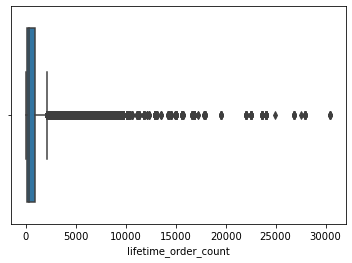

In [62]:
sns.boxplot(test_data['lifetime_order_count'])

C:\Users\rahul_liauvpp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lifetime_order_count'>

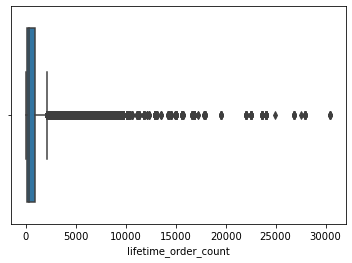

In [63]:
sns.boxplot(test_data['lifetime_order_count'])

In [64]:
train_data['time_of_day']=train_data['order_time'].dt.hour*60+train_data['order_time'].dt.minute
test_data['time_of_day']=test_data['order_time'].dt.hour*60+test_data['order_time'].dt.minute

<ipython-input-64-0905545c4105>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['time_of_day']=train_data['order_time'].dt.hour*60+train_data['order_time'].dt.minute


In [65]:
train_data['time_of_day'].describe()

count    449842.000000
mean        794.010999
std         216.618174
min          44.000000
25%         558.000000
50%         866.000000
75%         966.000000
max        1301.000000
Name: time_of_day, dtype: float64

In [66]:
(train_data['order_time'].dt.hour).value_counts()

14    70564
16    66291
15    66169
17    53621
13    43397
7     37644
8     37539
6     22882
9     22232
12     9259
10     8903
11     8131
4      1211
5      1088
3       644
18      167
2        61
19       25
20        8
0         2
1         2
21        2
Name: order_time, dtype: int64

In [67]:
train_data['normalised_time']=np.sin(train_data['time_of_day']/1440*np.pi)
test_data['normalised_time']=np.sin(test_data['time_of_day']/1440*np.pi)

<ipython-input-67-70f62e6e6d27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['normalised_time']=np.sin(train_data['time_of_day']/1440*np.pi)


In [68]:
train_data['normalised_time'].describe()

count    449842.000000
mean          0.879052
std           0.081186
min           0.095846
25%           0.817899
50%           0.891007
75%           0.946930
max           1.000000
Name: normalised_time, dtype: float64

In [69]:
train_data.isna().any()

order_time              False
order_id                False
allot_time              False
accept_time             False
rider_id                False
first_mile_distance     False
last_mile_distance      False
alloted_orders          False
delivered_orders        False
cancelled               False
undelivered_orders      False
lifetime_order_count    False
reassignment_method     False
reassignment_reason     False
reassigned_order        False
session_time            False
reassignment_score       True
is_weekend              False
wait_time               False
time_of_day             False
normalised_time         False
dtype: bool

In [70]:
#train_data.isnull().any()

In [71]:
#train_data[train_data.columns [train_data.isna ().any ()]]

In [72]:
#train_data.isnull ().any()

In [73]:
#train_data.loc[:, train_data.isnull().any()]

In [74]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144844 entries, 0 to 144843
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_time            144844 non-null  datetime64[ns]
 1   order_id              144844 non-null  int64         
 2   allot_time            144844 non-null  datetime64[ns]
 3   accept_time           144776 non-null  datetime64[ns]
 4   rider_id              144844 non-null  object        
 5   first_mile_distance   144844 non-null  object        
 6   last_mile_distance    144844 non-null  float64       
 7   alloted_orders        140071 non-null  float64       
 8   delivered_orders      139960 non-null  float64       
 9   undelivered_orders    139960 non-null  float64       
 10  lifetime_order_count  144066 non-null  float64       
 11  reassignment_method   144844 non-null  int32         
 12  reassignment_reason   144844 non-null  int32         
 13 

In [75]:
test_data['undelivered_orders']=test_data['undelivered_orders'].fillna(0)

In [76]:
test_data['delivered_orders']=test_data['delivered_orders'].fillna(test_data['delivered_orders'].mean())

In [77]:
test_data['session_time']=test_data['session_time'].fillna(train_data['session_time'].mean())

In [78]:
test_data['reassigned_order']=test_data['reassigned_order'].fillna(0)

In [79]:
test_data['alloted_orders']=test_data['alloted_orders'].fillna(train_data['alloted_orders'].mean())

In [80]:
test_data['lifetime_order_count']=test_data['lifetime_order_count'].fillna(train_data['lifetime_order_count'].mean())

In [81]:
test_data['wait_time']=test_data['wait_time'].fillna(train_data['wait_time'].mean())

In [82]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144844 entries, 0 to 144843
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_time            144844 non-null  datetime64[ns]
 1   order_id              144844 non-null  int64         
 2   allot_time            144844 non-null  datetime64[ns]
 3   accept_time           144776 non-null  datetime64[ns]
 4   rider_id              144844 non-null  object        
 5   first_mile_distance   144844 non-null  object        
 6   last_mile_distance    144844 non-null  float64       
 7   alloted_orders        144844 non-null  float64       
 8   delivered_orders      144844 non-null  float64       
 9   undelivered_orders    144844 non-null  float64       
 10  lifetime_order_count  144844 non-null  float64       
 11  reassignment_method   144844 non-null  int32         
 12  reassignment_reason   144844 non-null  int32         
 13 

In [83]:
test_data['reassignment_score']=test_data['reassignment_score'].fillna(0)
train_data['reassignment_score']=train_data['reassignment_score'].fillna(0)

<ipython-input-83-06f68ae98e19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['reassignment_score']=train_data['reassignment_score'].fillna(0)


In [84]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144844 entries, 0 to 144843
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_time            144844 non-null  datetime64[ns]
 1   order_id              144844 non-null  int64         
 2   allot_time            144844 non-null  datetime64[ns]
 3   accept_time           144776 non-null  datetime64[ns]
 4   rider_id              144844 non-null  object        
 5   first_mile_distance   144844 non-null  object        
 6   last_mile_distance    144844 non-null  float64       
 7   alloted_orders        144844 non-null  float64       
 8   delivered_orders      144844 non-null  float64       
 9   undelivered_orders    144844 non-null  float64       
 10  lifetime_order_count  144844 non-null  float64       
 11  reassignment_method   144844 non-null  int32         
 12  reassignment_reason   144844 non-null  int32         
 13 

In [85]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449842 entries, 0 to 449999
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_time            449842 non-null  datetime64[ns]
 1   order_id              449842 non-null  int64         
 2   allot_time            449842 non-null  datetime64[ns]
 3   accept_time           449842 non-null  datetime64[ns]
 4   rider_id              449842 non-null  int64         
 5   first_mile_distance   449842 non-null  float64       
 6   last_mile_distance    449842 non-null  float64       
 7   alloted_orders        449842 non-null  float64       
 8   delivered_orders      449842 non-null  float64       
 9   cancelled             449842 non-null  int64         
 10  undelivered_orders    449842 non-null  float64       
 11  lifetime_order_count  449842 non-null  float64       
 12  reassignment_method   449842 non-null  int32         
 13 

# NO, it's not the end!! dates will be processed again!!
just checking for efficiency of model

In [86]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_data.drop(['order_time',"allot_time","accept_time","cancelled","order_id",'reassignment_method','reassignment_reason','reassigned_order'],axis=1),train_data['cancelled'] , random_state=42)

In [87]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train = scaler.fit_transform(x_train)
X_valid = scaler.transform(x_valid)
X_test = scaler.transform(test_data.drop(['order_time',"allot_time","accept_time","order_id",'reassignment_method','reassignment_reason','reassigned_order'],axis=1))

In [88]:
X_train.shape

(337381, 13)

In [89]:
X_test.shape

(144844, 13)

In [148]:
model=keras.models.Sequential([
    keras.layers.Dense(500,activation="sigmoid",input_shape=X_train.shape[1:]),
    keras.layers.Dense(50,activation="sigmoid"),
    keras.layers.Dense(5,activation="sigmoid"),
    keras.layers.Dense(1,activation="sigmoid")
])

In [149]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               7000      
                                                                 
 dense_1 (Dense)             (None, 50)                25050     
                                                                 
 dense_2 (Dense)             (None, 5)                 255       
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 32,311
Trainable params: 32,311
Non-trainable params: 0
_________________________________________________________________


In [152]:
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.RMSprop(), metrics=[keras.metrics.AUC()])

In [153]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Best_Model_nrg.h5", save_best_only=True)

In [154]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("early_stop_model7.h5", save_best_only=True)

In [157]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

In [158]:
history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb]) 

Epoch 1/200
10544/10544 [==============================] - 16s 2ms/step - loss: 0.0597 - auc: 0.6069 - val_loss: 0.0584 - val_auc: 0.6426
Epoch 2/200
10544/10544 [==============================] - 17s 2ms/step - loss: 0.0595 - auc: 0.6172 - val_loss: 0.0592 - val_auc: 0.5276
Epoch 3/200
10544/10544 [==============================] - 17s 2ms/step - loss: 0.0595 - auc: 0.6135 - val_loss: 0.0584 - val_auc: 0.6130
Epoch 4/200
10544/10544 [==============================] - 17s 2ms/step - loss: 0.0595 - auc: 0.6130 - val_loss: 0.0594 - val_auc: 0.5512
Epoch 5/200
10544/10544 [==============================] - 18s 2ms/step - loss: 0.0594 - auc: 0.6240 - val_loss: 0.0593 - val_auc: 0.5580
Epoch 6/200
10544/10544 [==============================] - 18s 2ms/step - loss: 0.0595 - auc: 0.6187 - val_loss: 0.0593 - val_auc: 0.6781
Epoch 7/200
10544/10544 [==============================] - 17s 2ms/step - loss: 0.0595 - auc: 0.6081 - val_loss: 0.0590 - val_auc: 0.6159
Epoch 8/200
10544/10544 [=========

In [159]:
model.evaluate(X_valid,y_valid)

3515/3515 [==============================] - 3s 773us/step - loss: 0.0562 - auc: 0.6702


[0.056220658123493195, 0.6702032089233398]

In [161]:
y_test=model.predict(X_test)

In [162]:
y_test

array([[0.00621045],
       [0.0067111 ],
       [0.00553799],
       ...,
       [0.00912711],
       [0.00611299],
       [0.02612647]], dtype=float32)

In [144]:
del model

In [145]:
keras.backend.clear_session()

In [1]:
model = keras.models.load_model("early_stop_model7.h5")
Y_test=model.predict(X_test)

NameError: name 'keras' is not defined

In [124]:
(Y_test>=0.5).sum()

40

In [104]:
keras.backend.clear_session()

In [105]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               7000      
                                                                 
 dense_1 (Dense)             (None, 50)                25050     
                                                                 
 dense_2 (Dense)             (None, 5)                 255       
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 32,311
Trainable params: 32,311
Non-trainable params: 0
_________________________________________________________________


In [106]:
del model

In [115]:
y_test.size

144844

In [116]:
type(y_test)

numpy.ndarray

In [117]:
res=pd.DataFrame(test_data['order_id'])

In [118]:
res.size

144844

In [119]:
res['cancelled']=y_test

In [120]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144844 entries, 0 to 144843
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   order_id   144844 non-null  int64  
 1   cancelled  144844 non-null  float32
dtypes: float32(1), int64(1)
memory usage: 1.7 MB


In [122]:

res.columns = ["order_id","cancelled"]
res.to_csv("prediction_results9.csv", index = False)   

In [114]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144844 entries, 0 to 144843
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   order_id   144844 non-null  int64  
 1   cancelled  144844 non-null  float32
dtypes: float32(1), int64(1)
memory usage: 1.7 MB
